# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Access the local file using python code

In [3]:
from google.colab import files
uploaded = files.upload()

Saving df_scaled.csv to df_scaled.csv


# Load the dataset

In [6]:
df = pd.read_csv('df_scaled.csv')
df

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Outlet_No.
0,10107222.0,Batticaloa,-0.347692,-0.308787,0.520598,1,1
1,10149531.0,Batticaloa,-0.347612,-0.211738,0.784676,1,1
2,10389466.0,Batticaloa,-0.347496,-0.367402,0.423406,1,1
3,10596077.0,Batticaloa,-0.347496,-0.271276,0.682146,1,1
4,10244123.0,Batticaloa,-0.347398,-0.301495,0.633288,1,1
...,...,...,...,...,...,...,...
774142,10626995.0,Wattala,0.212166,-0.399838,0.645924,4,20
774143,10729524.0,Wattala,0.212166,-0.440558,0.607649,4,20
774144,10180348.0,Wattala,-0.713610,0.402667,-0.415914,2,20
774145,10047524.0,Wattala,0.941435,-0.230859,1.127004,4,20


# Assigning independent and dependent variables

In [8]:
x = df[['luxury_sales','fresh_sales','dry_sales','Outlet_No.']]
y = df['cluster_catgeory']

# Data Split (80/20)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [10]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [11]:
print(np.unique(y_train))

[1 2 3 4 5 6]


In [12]:
#since the model is starting with 0
y_train = y_train - 1
y_test = y_test - 1
#unique values for y_train column
print(np.unique(y_train))

[0 1 2 3 4 5]


# Xg Boosting

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Build the classification model

In [14]:
xgb_model = XGBClassifier(n_estimator = 50, max_depth = 4, learning_rate = 0.1,subsample = 0.8, tree_method = "hist",verbosity = 1)


In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'reg_lambda': [1,5],
    'reg_alpha': [0, 0.1]
}


In [16]:
# Use RandomizedSearchCV for faster with fewer iterations
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=3,scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model

In [ ]:
# Train the model
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}


# Model Evaluation

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9998062391009495


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[38013,     1,     1,     4,     0,     3],
       [    0, 31004,     2,     0,     0,     1],
       [    1,     2,  9840,     1,     1,     0],
       [    1,     1,     3, 34381,     2,     0],
       [    1,     0,     1,     0,  7882,     0],
       [    0,     2,     0,     2,     0, 33680]])

Text(95.72222222222221, 0.5, 'Truth')

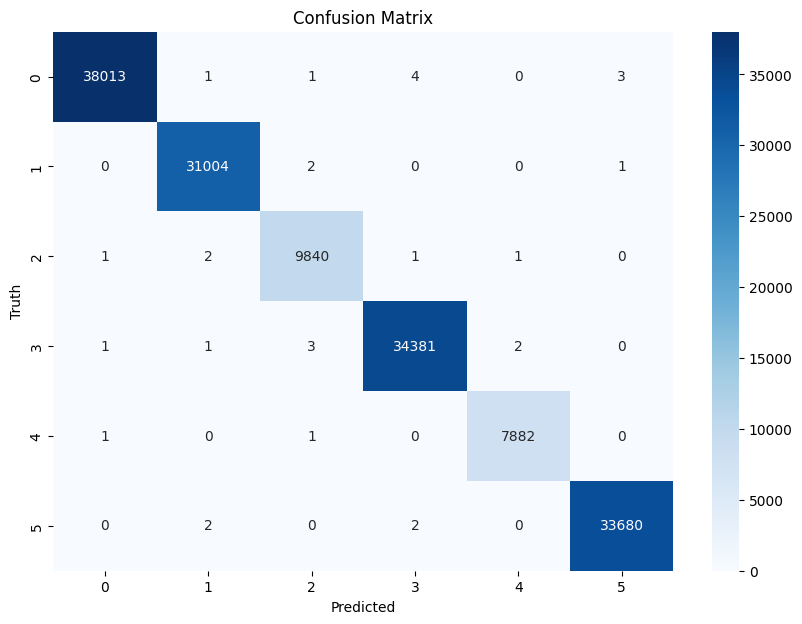

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd', cmap = 'Blues', xticklabels = range(0, len(cm)),yticklabels = range(0, len(cm)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38022
           1       1.00      1.00      1.00     31007
           2       1.00      1.00      1.00      9845
           3       1.00      1.00      1.00     34388
           4       1.00      1.00      1.00      7884
           5       1.00      1.00      1.00     33684

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



# Feature Importance

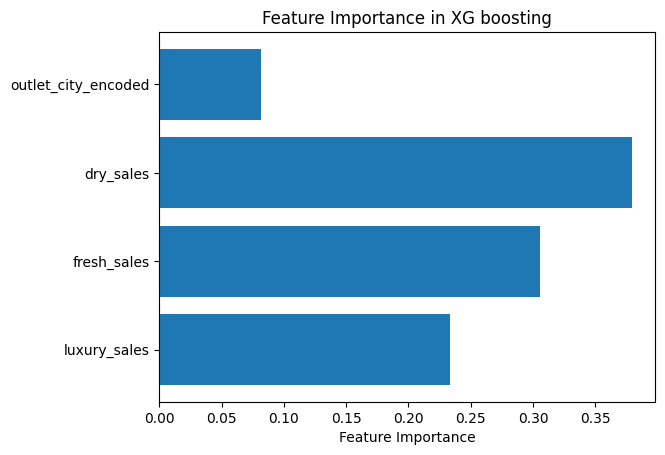

In [ ]:
feature_importance = best_model.feature_importances_
feature_names = x_train.columns

plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XG boosting')
plt.show()